# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("Kz")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26'

In [6]:
DATASET_NAME = "kz"
VERSION = "2021_09_01_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt'

In [8]:
class kz(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H",
                        "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 50
        self.gpus = 1

In [9]:
ocrTextDetector = kz()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=24)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'P', '8', '7', 'U', 'W', 'R', 'K', '5', 'A', 'G', 'M', 'B', 'H', '6', 'X', 'L', 'J', 'Z', 'D', 'E', '3', 'S', 'I', 'Y', 'C', '4', '0', 'F', 'V', 'T', 'Q', '2', '9', 'O', '1', 'N'}
Letters val  {'P', '8', '7', 'U', 'W', 'R', 'K', '5', 'A', 'G', 'M', 'B', 'H', '6', 'X', 'L', 'J', 'Z', 'D', 'E', '3', 'S', 'C', 'Y', 'I', '4', '0', 'F', 'V', 'T', 'Q', '2', '9', 'O', '1', 'N'}
Letters test  {'P', '8', '7', 'U', 'W', 'R', 'K', '5', 'A', 'G', 'M', 'B', 'H', '6', 'X', 'L', 'J', 'Z', 'D', 'E', '3', 'S', 'C', 'Y', 'I', '4', '0', 'F', 'V', 'T', 'Q', '2', '9', 'O', '1', 'N'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.2511886431509577



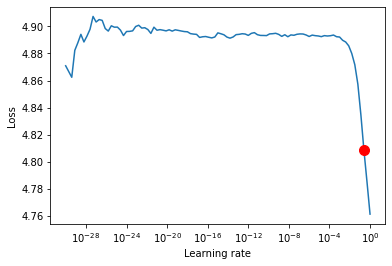

In [11]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [13]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=44-step=6119.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.12375172227621078}
--------------------------------------------------------------------------------


NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [14]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt


In [15]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [16]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12587103.jpg-1.png
Predicted: 3278nab13 			 True: 327nab13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91241333-9-full.jpg-0.png
Predicted: z12fpa07 			 True: 812fpa07

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12487794.jpg-1.png
Predicted: 321wva02 			 True: 321vva02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12505441.jpg-0.png
Predicted: 155lka02 			 True: 195lka02

[INFO] /var/www/nomeroff-net24/NomeroffN

0.8673835125448028

In [14]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

## than train with augumentation

In [8]:
class kz(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H",
                        "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
        
        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 35
        self.gpus = 1

In [11]:
ocrTextDetector = kz()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=24)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'G', 'L', 'Y', 'S', 'P', 'O', 'E', 'X', 'F', '3', '2', '5', 'V', 'C', 'D', 'A', '4', '9', 'M', '7', 'B', '0', 'N', 'I', 'R', 'J', 'U', 'K', 'H', 'Q', 'W', '6', 'T', '1', '8', 'Z'}
Letters val  {'G', 'L', 'Y', 'S', 'P', 'O', 'E', 'X', 'F', '3', '2', '5', 'V', 'C', 'D', 'A', '4', '9', 'M', '7', '0', 'B', 'N', 'I', 'R', 'J', 'U', 'K', 'H', 'Q', 'W', '6', 'T', '1', '8', 'Z'}
Letters test  {'G', 'L', 'Y', 'S', 'P', 'O', 'E', 'X', 'F', '3', '2', '5', 'V', 'C', 'D', 'A', '4', '9', 'M', '7', '0', 'B', 'N', 'I', 'R', 'J', 'U', 'K', 'H', 'Q', 'W', '6', 'T', '1', '8', 'Z'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [12]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
ocrTextDetector.load('/var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.4')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 0
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 0


Epoch    33: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=34-step=12739.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.05041758343577385}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90807116-2-full.jpg-0.png
Predicted: 152ny13 			 True: 152nyb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12504001.jpg-0.png
Predicted: 181neb05 			 True: 181ncb05

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12499171.jpg-0.png
Predicted: 201vz03 			 True: 201vcz03
Testing Accuracy:  0.9498207885304659
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.0


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 0


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=33-step=12375.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04582029953598976}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/86603142-3-full.jpg-0.png
Predicted: 7920pam 			 True: t920pam

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 66ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: 41ddfa02 			 True: 410ofa

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90891216-14-full.jpg-0.png
Predicted: 462ga02 			 True: 462iga02
Testing Accuracy:  0.9498207885304659
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 1


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=34-step=12739-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04983675107359886}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90807116-2-full.jpg-0.png
Predicted: e152nyb13 			 True: 152nyb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90935559-11-full.jpg-0.png
Predicted: 676vbz1 			 True: 676vbz15

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/87787793-1-full.jpg-0.png
Predicted: 351ca09 			 True: 35

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


Testing Accuracy:  0.956989247311828
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 2


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.2511886431509577



Global seed set to 3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=34-step=12739-v2.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04727626591920853}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: 41dgfa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90017879-37-full.jpg-0.png
Predicted: 88kzt01 			 True: 888kzt01

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91217089-22-full.jpg-0.png
Predicted: 069vipt09 			 True: 

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91154679-23-full.jpg-0.png
Predicted: 060esa5 			 True: 060esa15

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90891216-14-full.jpg-0.png
Predicted: 46zga02 			 True: 462iga02
Testing Accuracy:  0.956989247311828
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 3


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=30-step=11283.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04305306822061539}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: 40dfa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12583383.jpg-0.png
Predicted: 243hwa02 			 True: 243mwa02

[

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


Testing Accuracy:  0.967741935483871
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.4


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 4


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 5
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648



Global seed set to 5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=33-step=12375-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04445618763566017}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456leb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12520272.jpg-0.png
Predicted: 242cnb02 			 True: 242gnb02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91147748-25-full.jpg-0.png
Predicted: 123pd103 			 True: 123pda03

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


Testing Accuracy:  0.967741935483871
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.5


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 5


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 6
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648



Global seed set to 6


Epoch    30: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=32-step=12011.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.05622687190771103}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: v8dcfa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90034772-13-full.jpg-0.png
Predicted: a577cno 			 True: a67

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Testing Accuracy:  0.96415770609319
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.6


Global seed set to 6


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 7
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=30-step=11283-v1.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04910752549767494}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12582878.jpg-0.png
Predicted: 44ara04 			 True: 444ara04

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 66ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: loofa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90017879-37-full.jpg-0.png
Predicted: 8888kzt01 			 True: 888kzt01



GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90891216-14-full.jpg-0.png
Predicted: 467ga02 			 True: 462iga02
Testing Accuracy:  0.9605734767025089
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 7


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=31-step=11647.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.05809354782104492}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lpb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: 4qgfa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91309424-6-full.jpg-0.png
Predicted: a315vb0 			 True: a315

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing Accuracy:  0.953405017921147
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.8



  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 8


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 9


Epoch    31: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=24-step=9099.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.022927191108465195}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90879012-2-full.jpg-0.png
Predicted: 851rz05 			 True: 851irz05

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/31244487-1-full.jpg-0.png
Predicted: 41dgfa02 			 True: 410ofa02

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12583383.jpg-0.png
Predicted: 243ma02 			 True: 243mwa02



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12493210.jpg-0.png
Predicted: 888ee04 			 True: 888eee04
Testing Accuracy:  0.956989247311828
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.9


Global seed set to 9


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    35: reducing learning rate of group 0 to 2.0000e-03.

[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=28-step=10555.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.051383551210165024}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12582878.jpg-0.png
Predicted: 444aba04 			 True: 444ara04

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/91147748-25-full.jpg-0.png
Predicted: 123pda103 			 True: 123pda03

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90017879-37-full.jpg-0.png
Predicted: 88kzt01 			 True: 888kzt

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90891216-14-full.jpg-0.png
Predicted: 462ga02 			 True: 462iga02
Testing Accuracy:  0.956989247311828
model save to /var/www/nomeroff-net24/models/anpr_ocr_kz_2021_09_01_pytorch_lightning.ckpt.10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 10


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 11


Epoch    34: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=27-step=10191.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.06785141676664352}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90999739-9-full.jpg-0.png
Predicted: 456lb13 			 True: 456llb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90807116-2-full.jpg-0.png
Predicted: 152ny13 			 True: 152nyb13

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/12582878.jpg-0.png
Predicted: 44ara04 			 True: 444ara04

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/Kz/autoriaNumberplateOcrKz-2019-04-26/test/img/90783148-2-full.jpg-0.png
Predicted: 666ff06 			 True: 666fff06

[I

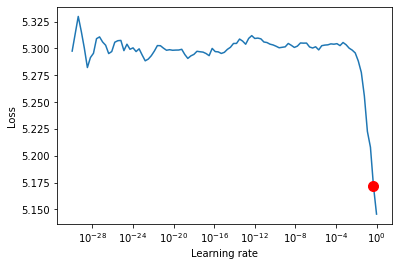

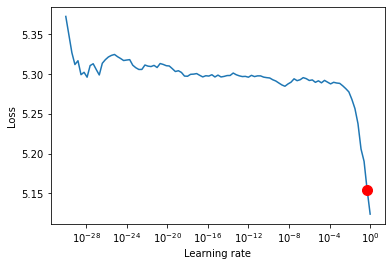

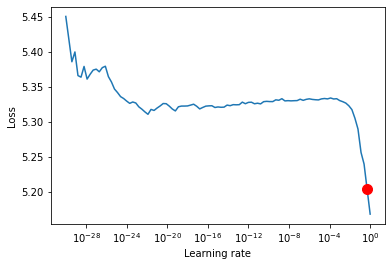

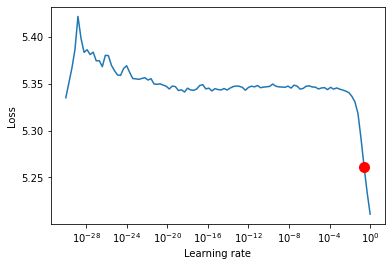

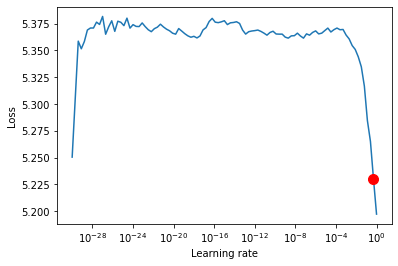

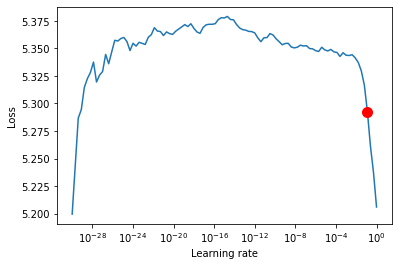

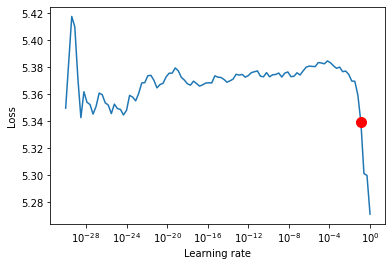

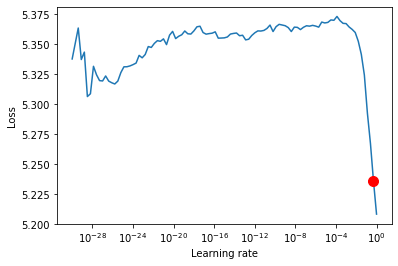

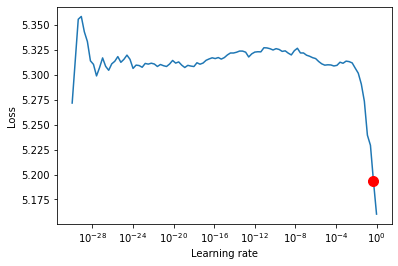

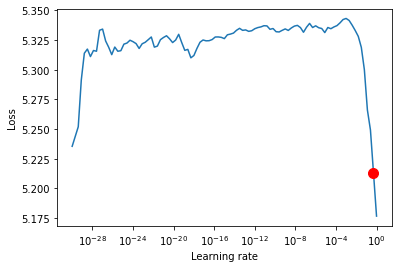

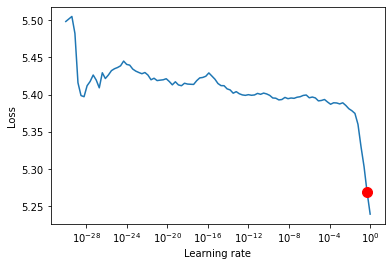

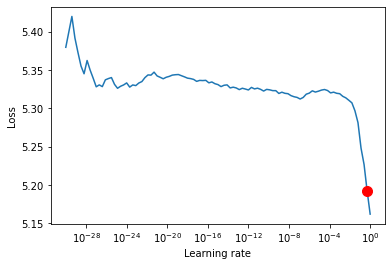

In [13]:
for i in range(0,12):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))